# Project description
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.


# What we will research in this project:
    1.Learn to predict the probability of churn (for the upcoming month) for each customer
    2.Draw up typical user portraits: select the most outstanding groups and describe their main features
    3.Analyze the factors that impact churn most
    4.Draw basic conclusions and develop recommendations on how to improve customer service:
    5.identify target groups
    6.Suggest measures to cut churn
    7.Describe any other patterns you see with respect to interaction with customers


<b>** Data available:</b>

'Churn' — the fact of churn for the month in question

Current dataset fields:
User data for the preceding month
'gender'

'Near_Location' — whether the user lives or works in the neighborhood where the gym is located

'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)

Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)

'Phone' — whether the user provided their phone number

'Age'

'Lifetime' — the time (in months) since the customer first came to the gym

Data from the log of visits and purchases and data on current membership status
'Contract_period' — 1 month, 3 months, 6 months, or 1 year

'Month_to_end_contract' — the months remaining until the contract expires

'Group_visits' — whether the user takes part in group sessions

'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime

'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month

'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

# Step 1. Download the data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

data = pd.read_csv('/datasets/gym_churn_us.csv')
data=data.drop_duplicates()
display(data.head(5))
display(data.shape)
display(data.info())


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


(4000, 14)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 468.8 KB


None

Step 1 Result: Data is stored and displayed first 5 rows. We can see that No column has a Nan values, so data set is complete.

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
Nice data quality analysis 👍🏻
    
It is also worth checking your data fot duplicates.

<b> **added checking for duplicates above in the code </b>

# Step 2. Carry out exploratory data analysis (EDA)
    1.Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).
    2.Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).
    3.Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
    4.Build a correlation matrix and display it.



##    1.Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).


In [2]:
print(data.shape)
display(data.info())

(4000, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 468.8 KB


None

Result:DataFrame size is fine. There are 4000 observations and 14 fields. All features are numeric. Churn is set to True/False values of 0 or 1 and it could be used as our Category, another  gender is divided into 0 and 1.  


In [3]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Result: Seems like Churn rate is on average ~26% with standard deviation of ~44%.

<b> ** Result: Our average customer is lives closer to the location, has phone numbers saved with the gym,  has a contract period of ~5 month. average of age of 29 years old, with average additional charges of 147 dollars, about 4 months months left to end contract, about 3 months passed since they first joined gym, on average about 2 times visit per week in previous monthes, and slightly less for current month but genrally same amount, and churn of 26%. </b>

<div class="alert alert-success">
<h3>Reviewer's comment v2</h3>
    
Great job 👍🏻

<b> ** Standard deviation is swinging in small and large numbers from the mean, so standartizing is necessary to see relatively equivalent numbers. Notice Avg_additional_charges_total	and Avg_class_frequency_total	 being on a large difference in values. </b>

## 2.Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [4]:
display(data.groupby('Churn').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


users who are employees of a partner company, near location, have longer contract period, and   tend to be more often be among 
    

<b> **expanded conclusion </b>:
For users in churn (0 - false), we see that difference is mainy in following:
churn of 0 has less likely to have a partner, more likely to have a promotion from friends, longer contract_period by almost 4 extra months, double of group visits, slightly older (29 years vs 26 yeart of churn 1), spend 43 dollars on average more than churn of 1, 4 extra months more to end contract than churn of 1, longer lifetime with the gym by ~3 months, 25% more visits ofa gym compared to churn of 1 for previous months, and 50% more visits in current month than users in churn of 1.

<div class="alert alert-success">
<h3>Reviewer's comment v2</h3>
    
Good 👍🏻

## 3.Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

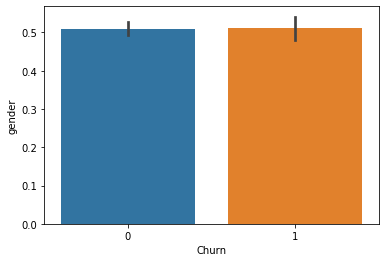

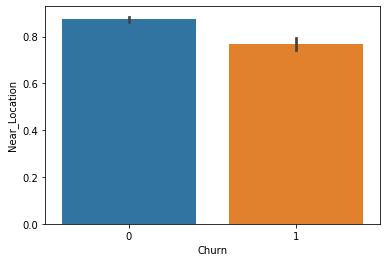

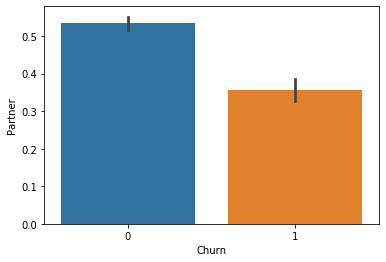

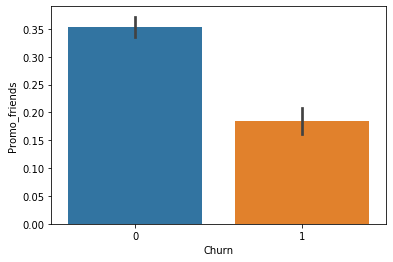

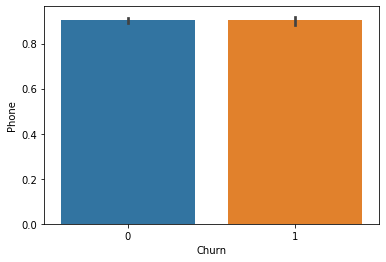

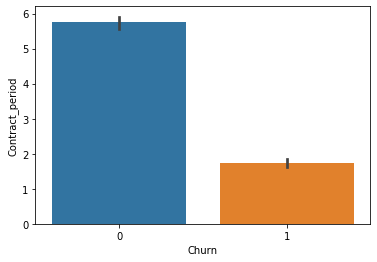

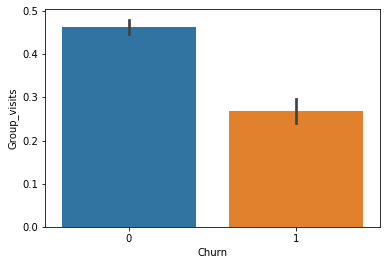

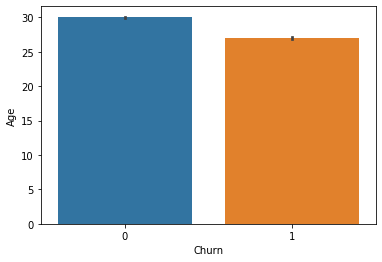

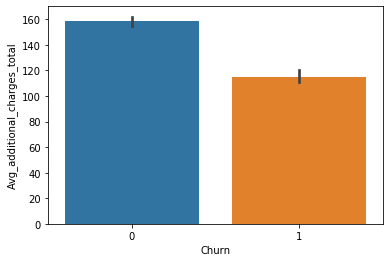

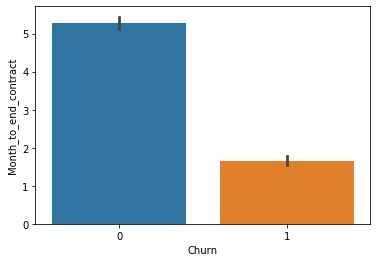

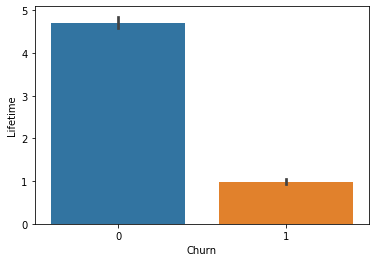

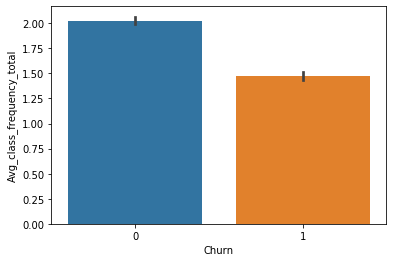

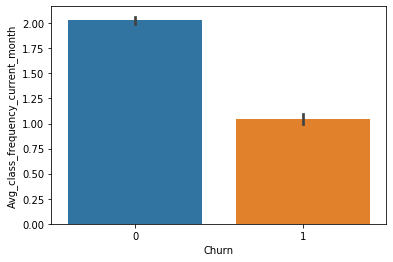

In [5]:
# plot paired distribution feature-traget variable diagrams for each feature
for col in data.drop('Churn', axis = 1).columns:
    sns.barplot(data['Churn'], data[col])
# write your code here
    plt.show()

<b>**Result:</b> Graph above shows a better observation between churn and features. It shows visually that average claff frequency for current month and churn of 0 is almost twice more than users in churn 1. Lifetime for users in Churn 0 is almost 5 times more than users in Churn 1, meaning users who have a longer lifetime tend to be more likely to not be in Churn. Users who have a churn of 0 have almost 5 times more of churn left than users in Churn of 1. Users coming to gym with partners are more likely to stay in churn of 0 than other group. Gender, Location, and age do not realy matter for users staying in churn 0 and 1 as there is little to no difference.

<div class="alert alert-success">
<h3>Reviewer's comment v2</h3>
    
You conducted nice EDA 👍🏻

Text(0.5, 1.0, 'Churn Histogram for users who stayed(0) and users who left (1)')

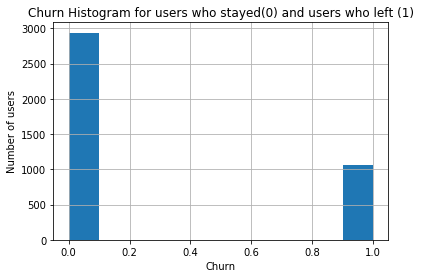

In [6]:

data['Churn'].hist()    
plt.ylabel('Number of users')
plt.xlabel('Churn')
plt.title('Churn Histogram for users who stayed(0) and users who left (1)')

Result: Over 1000 users left while little less than 3000 users stayed.

## 4.Build a correlation matrix and display it.

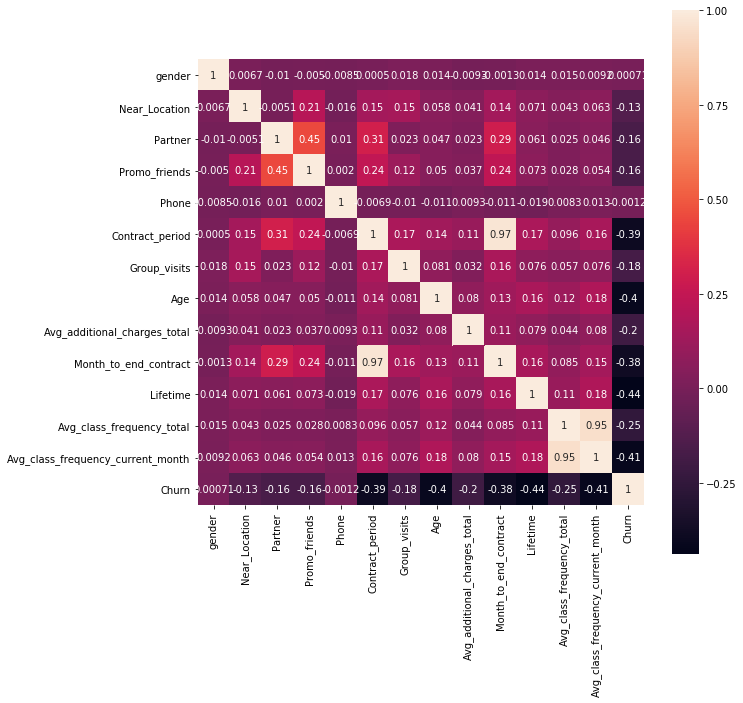

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
cm = data.corr() # calculate correlation matrix

# plot an annotated heatmap for the correlation matrix
sns.heatmap(cm, annot = True, square=True)

# write your code here
#ax.set_ylim(15, 0) # correcting "ragged" heatmap fields in the latest version of the library
#plt.show()



Result: Highest corellations are following pairs: 1. Contact_period and Month_to_end_contact, 2. Avg_class_frequency_total and Avg_class_frequency_current_month with almost 100%.

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
Agree with your observation! One variables from the pair of correlated features should be removed, otherwise it is gonna dominate other features at the training stage.
    
It is also worth mentioning that our target variable has no strong correlation with any feature.

# Step 3. Build a model to predict user churn
    1.Build a binary classification model for customers where the target feature is the user's leaving next month.
        Divide the data into train and validation sets using the train_test_split() function.
        Train the model on the train set with two methods:
        a)logistic regression
        b)random forest
    Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
    Remember to indicate the random_state parameter when dividing data and defining the algorithm.



##    1.Build a binary classification model for customers where the target feature is the user's leaving next month.
        a)logistic regression
        b)random forest


In [8]:
# define the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
#    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
#data['Month_to_end_contract']=data['Month_to_end_contract'].astype(int)
#data2=data[data['Month_to_end_contract']==1]
# divide the data into features (the X matrix) and a target variable (y)
X = data.drop(columns = ['Churn'])# store the object-feature matrix into the variable, having removed the column with the target variable from the DataFrameой
y = data['Churn']==1# store the column witht the target variable value into the variable

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# define the algorithm for the logistic regression model
lr_model = LogisticRegression(random_state=0,solver='lbfgs')
# train the model
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')




# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # write your code here
# train the random forest model
rf_model.fit(X_train_st, y_train )
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st) # write your code here
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] # write your code here
# print all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')


Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83


<b>** added argument = (solver='lbfgs') to LogisticRegression to remove warning</b>

<b>Result: Seems like Logic Regression has slightly better precision of 85% and accuracy of 92%.</b>

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
The step is completed absolutely correctly! Logistic regression outperformed RF by almost all metrics.

# Step 4. Create user clusters
    1.Set aside the column with data on churn and identify object (user) clusters:
        a.Standardize the data.
        b.Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
        c.Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
        d.Look at the mean feature values for clusters. Does anything catch your eye?
        e.Plot distributions of features for the clusters. Do you notice anything?
        f.Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?


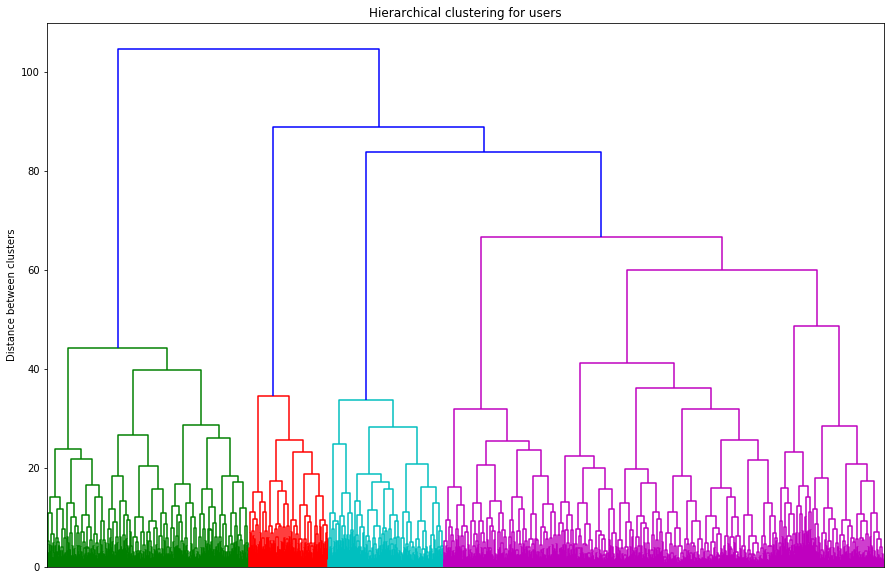

In [9]:
# part a = standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(X)

#part b = use linkage function to build a matrix distances based on the standardized feature matrix
linked = linkage(x_sc, method = 'ward') 

# plot a dendogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchical clustering for users')
plt.ylabel('Distance between clusters')
plt.show() 



<b>Result: dendogram above shows that initially we have 2 clusters Green and everything else where distance of similarity between them is quite different. Then we see that our green cluster further differentitates into two further clusters where distance gets further apart but not quite different.
 
Now if we look at red cluster, it is closely corellated with blue in distance overall and same with one of clusters within purple cluster meaning we have red, blue and part of purple cluster showing some sort of corellation that we saw in our corellation table</b>

d.Look at the mean feature values for clusters. Does anything catch your eye

<b>**I thought we need to  standardize entire dataset and remove means so that we compare it all against all the fields? If we are to compare against target variable we will then use X 80% without target to see what the rest of data compares. </b>

<b> **added random_state=0 to make it 0 to have centroid initialization at 0 </b>

In [10]:
# standardize the data
#sc = StandardScaler()
#x_sc = sc.fit_transform(data)

# define the k_means model with 3 clusters
km = KMeans(n_clusters = 5,random_state=0)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(x_sc)

# store cluster labels in the field of our dataset
data['cluster_km'] = labels
# print the statistics of the mean feature values per cluster
print(data.groupby('cluster_km').mean())


              gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.502473       0.959446  0.783383       0.574679  1.000000   
1           0.522078       0.862338  0.470130       0.306494  0.000000   
2           0.495050       0.000000  0.463366       0.079208  1.000000   
3           0.485737       1.000000  0.350238       0.240095  1.000000   
4           0.560335       0.976105  0.356033       0.229391  0.998805   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                 10.884273      0.543027  29.980218   
1                  4.787013      0.425974  29.301299   
2                  2.352475      0.215842  28.477228   
3                  1.948494      0.341521  28.167987   
4                  2.665472      0.473118  30.127838   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km 

<b>Result: Churn average is on the opposite end of to the Contract period. Also Contract_period is opposite ends of Avg_class_frequency_total  and Avg_class_frequency_current_month.</b>

### e.Plot distributions of features for the clusters. Do you notice anything?


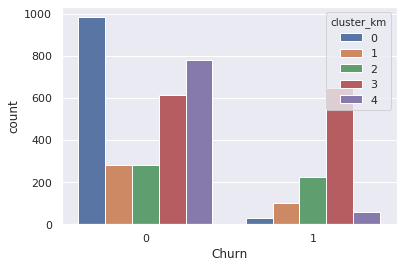

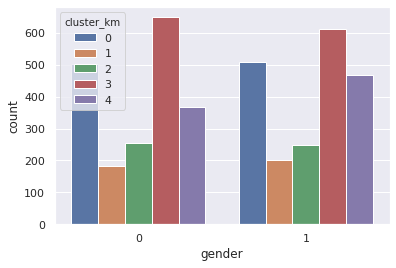

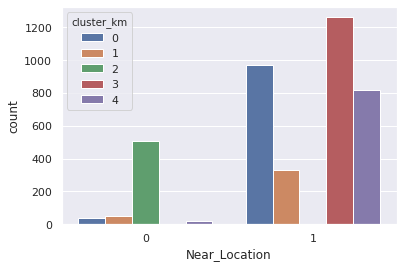

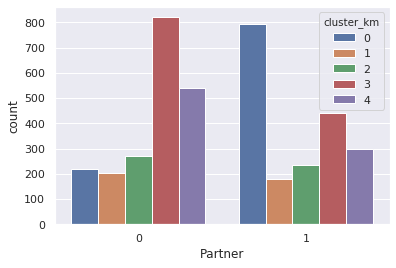

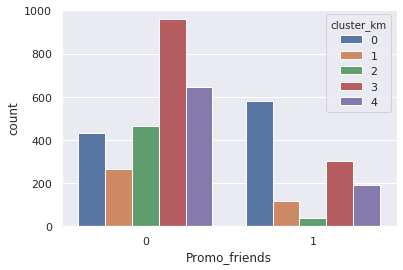

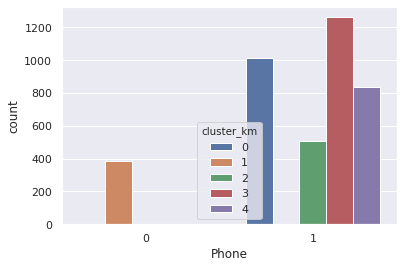

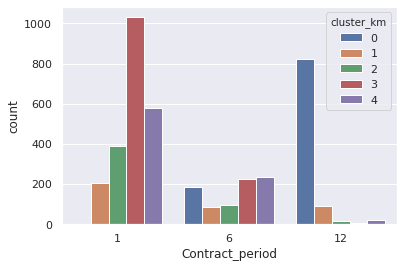

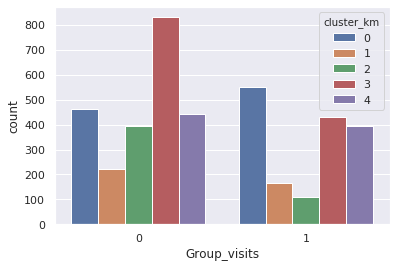

In [11]:
#Plot distributions of features for the clusters and make conclusions.

#############################THIS SHOULD BE DELETED##################################
# standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(data)

# define the k_means model with 3 clusters
km = KMeans(n_clusters = 5)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(x_sc)
###########################WE ALREADY HAVE CLUSTERING ABOVE#########################
features = ['Contract_period','Month_to_end_contract']#,'Lifetime']#,'Avg_class_frequency_total']

num_feature = ['Churn','gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits']
float_feature=['Avg_class_frequency_total','Avg_class_frequency_current_month','Age','Lifetime','Month_to_end_contract','Avg_additional_charges_total']
for feature in num_feature:
    sns.set(style="darkgrid")
    ax = sns.countplot(x=feature, data=data, hue='cluster_km')
    plt.show()

<b> **Results:
    1. There are far more users in Churn of 0 in most clusters. Only Cluster that we see the most with Churn of 1 is green Cluster so we need to find out why green cluster has that many users are likely to leave.
    
    2. Gender is spread out almost evenly in all clusters.
    
    3. Far more users are near location of the gym as they are showing value of 1/True.

    4. Partner field is quite opposite for clusters green and red, rest are almost evenly spread out. Might need to see why Green cluster is scoring lower.
    
    5. Promo Friends are only higher in red cluster, rest of the clusters are not using promotion from friends as much.
    
    6. All Clusters except Blue have phone numbers reported.
    
    7. As observed further Contract Period is highest in cluster Green  for shortest 1 month, while highest for 12 moth in Red Cluster. 
    
    8. Group visits are equally spread out for the most part with Green cluster having less group visits than with. Perhaps we need to incentivise to have more group visits for users in green cluster to increase their contract period.
    
</b>

<b>** removed clustering one more time, that was a duplicate mistake. Thanks </b>

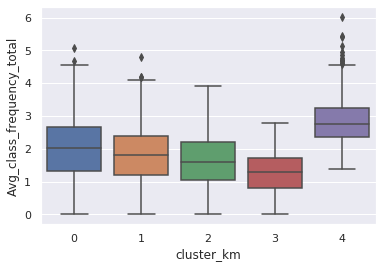

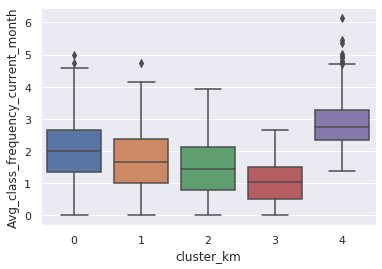

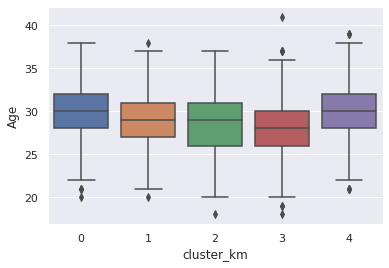

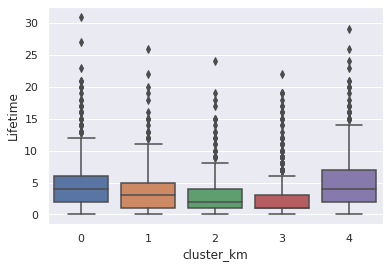

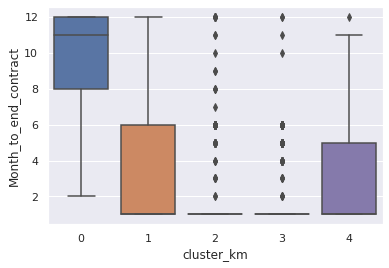

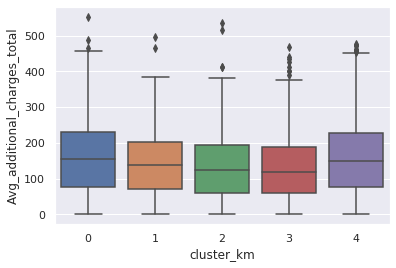

In [16]:
for feature in float_feature:
    sns.set(style="darkgrid")
    sns.boxplot(x = 'cluster_km', y = data[feature], data = data)
    plt.show()

Result:Age across all clusters  is really high between agest 26 and 31 with lowest age for clusters being 40, and highest definetely for cluster red and blue. Orange cluster has lowest number of users around 40 users per each age for highest rate. So we definetely should focus on users of age between 26 and 31 as they are highest number age gap.

Lifetime graph shows quite a large number for users having used 2 month , especially in red cluster. all the clusters descend as the lifetime grows. Notice Blue cluster shows gradual decrease in lifetime than other clusters. Blue cluster are users that are more likely to stay long term.

Month to end contract show that blue cluster usually has highest subscription, rest of the clusters are especially high having 1 month left to end the contract.  Red cluster has over 1000 users to have 1 month left to end contract. We need to make sure they are renewing contract because we have less than 200 users left to renew contract for red cluster with 6 month left.

In [13]:
# Boxplot between churn and continious variables displayed by clusters. 
#for feature in float_feature:
#    ax = sns.boxplot(x='Churn', y=feature, hue='cluster_km', data=data)
#    plt.show()

Result: On average we see in Churn of 0 more frequency in class visits in total among users in yellow cluster, almost over 3 times a week or more. Are they athletes? Then we see a bit worse result in Churn 1 for the Yellow cluster, but there is no purple cluster in Churn 1. Rest look somewhat similar.Green visits on average is 1 in churn 0 and 1.5 in Churn 1.
<br><br>
Current month visits shows not much difference except we see more spread out participation for yellow cluster within same number of visits of little over 2.
<br><br>
Additional charges total for users in Churn 0 shows similar among all groups  except green, green spends precisely around 250 USD, but in Churn of 1 Green spends much less with exceptions of few spending over 350 USD. Churn 1 on average spends much less money. Seems like people in Churn of 1 show less interest in spending additional money.
<br><br>
Age data shows that in CHurn of 0 there are mostly 30 year old adults with highest age span being in red cluster between ages of 18 to 40+, Orange cluster is only cluster that is stable in its age distribution with no too young of users or too old in the age distribution for Churn 0. For Churn 1 we see that average age is around 25-27 and lower compared to users in churn 0. Seems like younger users tend to be in churn 1 more often.
<br><br>
Lifetime for Churn of 0 for all groups in Churn 0 are around 4-5 months with quite a bit of users in each cluster being on an extreme side up to 30 months, expecially for blue cluster. Lowest scoring in lifetime with churn of 0 is Red cluster and higshest is purple and orange. I am convinced orange are professional athletes or take it more professionally. 
On the Curn of 1 we see all groups having 1 month lifetime and I think those are typically firs time users, exception is we have fewer blue having used gym more than 1 month before, same with purple. Seems like we have quite a bit of users on red cluster, so we need to find out why they havent renewed the contract, unless they initially signed for 6 month only and havent updated their contract yet.
<br><br>
Month to end contract shows a good example for users in Churn 0 where we have quite a loyal clusters. Blue cluster signs up right away for a year with averaging around 11 months, Orange is too signing up for a year and averaging around 6 months, same with green. Red seems to have consistent 6 months contract on average and Purple is about the same. Lowest scoring cluster is Red with average of 4 months.
In Churn 1 Blue Cluster is still leading with average of 10 months contract so we need to find out why they got into Churn 1, this is alarming to lose long term contractors. Rest of the clusters are dispersed somewhat equally.

In [14]:
#f.Calculate the churn rate for each cluster (use the groupby() method). 
#Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?
display(data.groupby('cluster_km')['Churn'].mean())

cluster_km
0    0.027695
1    0.267532
2    0.443564
3    0.514263
4    0.068100
Name: Churn, dtype: float64

Conclusion: Cluster 1,3,4 are likely to stay where cluster 2 is very likely to leave.

# Step 5. Come up with conclusions and basic recommendations on working with customers
Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.


Conclusion:

<div class="alert alert-success">
<h3>Reviewer's comment v3</h3>
    
The conclusion is well-structured and informative. I appreciate that you suggested some intersting ideas 🙂

<b>** all my comments are entered in this project with ** in bold statements. I think I answered your questions but if you think I havent can you give a part of assignment as a reference for me to crossreference? Thank you :) </b>

<b> made changes as requested, updated conclusion <b>